In [20]:
import pandas as pd
import numpy as np
from numpy import array
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression



In [15]:
games_df = pd.read_csv('games.csv')


# AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies

exclude = ['AppID', 'Name', 'Release date', 'About the game', 'Header image', 'Website','Categories', 'Tags','Support url', 'Developers', 'Publishers', 'Support email', 'Metacritic url', 'Notes',  'Genres', 'Screenshots', 'Movies',  'Reviews',   'Supported languages', 'Full audio languages', 'User score',  'Movies',  'Score rank']
games_crop = games_df.drop(exclude, axis=1)



print(games_crop.head())

  Estimated owners  Peak CCU  Required age  Price  DLC count  Windows    Mac  \
0        0 - 20000         0             0  19.99          0     True  False   
1        0 - 20000         0             0   0.99          0     True   True   
2        0 - 20000         0             0   4.99          0     True  False   
3        0 - 20000         0             0   5.99          0     True   True   
4        0 - 20000         0             0   0.00          0     True   True   

   Linux  Metacritic score  Positive  Negative  Achievements  Recommendations  \
0  False                 0         6        11            30                0   
1  False                 0        53         5            12                0   
2  False                 0         0         0             0                0   
3   True                 0         3         0             0                0   
4  False                 0        50         8            17                0   

   Average playtime forever  Ave

In [16]:
# Inicializar el LabelEncoder
le = LabelEncoder()

# Ajustar y transformar la columna 'estimated_owners' con LabelEncoder
games_crop['Estimated owners'] = le.fit_transform(games_crop['Estimated owners'])

# Convertir la columna transformada a una lista
estimated_owners_list = games_crop['Estimated owners'].tolist()

games_crop.drop(['Estimated owners'], axis=1, inplace=True)

print(estimated_owners_list)

[1, 1, 1, 1, 1, 10, 1, 1, 1, 10, 6, 10, 1, 6, 1, 7, 1, 2, 1, 1, 6, 6, 2, 6, 6, 1, 6, 1, 1, 1, 1, 1, 1, 6, 2, 1, 1, 1, 1, 7, 10, 10, 2, 1, 10, 10, 1, 8, 6, 1, 6, 1, 1, 0, 1, 1, 6, 8, 1, 1, 1, 6, 7, 1, 6, 1, 11, 6, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 1, 1, 1, 1, 1, 1, 1, 6, 6, 1, 1, 7, 1, 0, 8, 1, 1, 1, 6, 6, 1, 1, 1, 0, 0, 1, 10, 1, 11, 1, 11, 7, 1, 1, 3, 2, 1, 10, 1, 7, 1, 1, 1, 6, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 6, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 0, 1, 6, 7, 1, 1, 1, 10, 6, 1, 1, 6, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 7, 6, 0, 6, 1, 1, 6, 1, 10, 0, 1, 0, 1, 1, 1, 0, 1, 6, 6, 1, 6, 1, 10, 1, 10, 1, 1, 1, 1, 2, 0, 1, 7, 1, 6, 7, 1, 1, 1, 1, 1, 10, 1, 1, 6, 1, 1, 1, 1, 6, 0, 1, 11, 1, 0, 1, 6, 1, 1, 6, 1, 11, 1, 1, 1, 1, 6, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 7, 1, 1, 0, 1, 0, 1, 1, 1, 10, 0, 1, 1, 1, 1, 10, 6, 1, 2, 1, 0, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1

In [17]:

X_train, X_test, y_train, y_test = train_test_split(games_crop, estimated_owners_list, test_size=0.2, random_state=42)


In [22]:
# Inicializa un modelo con la parametrización óptima.
#Crea un modelo con la parametrización óptima y ajústalo a los datos de entrenamiento. Luego, informa el rendimiento en el conjunto de prueba utilizando la función `score` de la clase RandomForestClassifier.
rf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='entropy',max_features='sqrt',bootstrap=False)
# Ajusta el conjunto de datos de entrenamiento y evalúa el modelo utilizando la función score.
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Score:", rf.score(X_test,y_test))

NameError: name 'GradientBoostingClassifier' is not defined

In [ ]:
predDf = pd.DataFrame({'Actual': le.inverse_transform(y_test), 'Predicted': le.inverse_transform(y_pred)})

display(predDf)

In [ ]:
# Imprime una matriz de confusión (debe incluir todas las etiquetas)
# Imprime los resultados finales de la métrica F1 para esto (puedes suprimir las advertencias o modificar el cálculo de F1 como antes).
print("F1 =", f1_score(y_test, y_pred, average='weighted'), "Precisión =", accuracy_score(y_test, y_pred))

In [ ]:
# Muestra el marco de datos de importancia.
# Completar
compareDf = pd.DataFrame(
    {
        'Variables': games_crop.columns,
        'Importancia': rf.feature_importances_
    }
)
display(compareDf)

C:\Users\Vichito\AppData\Local\Temp\ipykernel_15116\2883858890.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = games_df.corr()


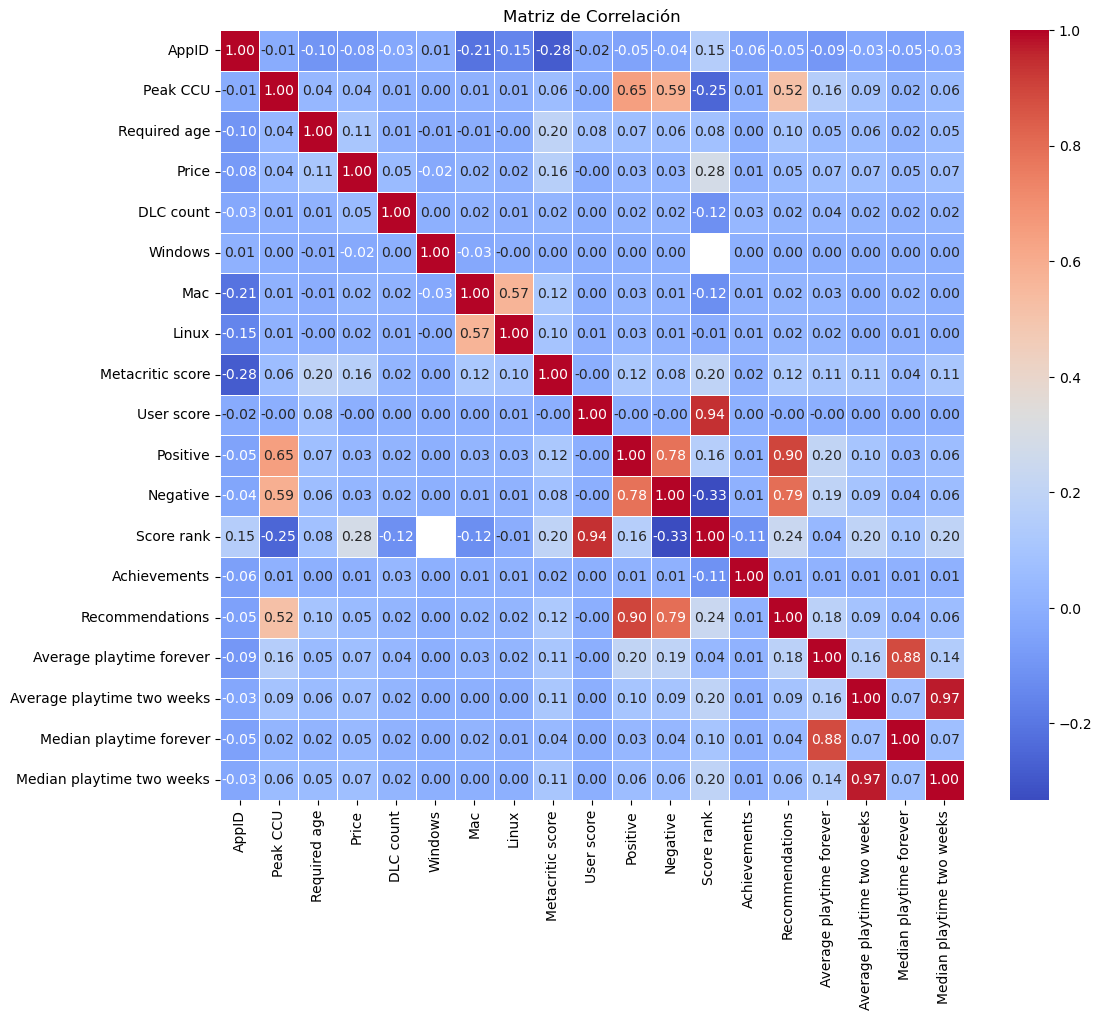

In [23]:
# Calcular la matriz de correlación
correlation_matrix = games_df.corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# Inicializar el LabelEncoder
le = LabelEncoder()

# Ajustar y transformar la columna 'estimated_owners' con LabelEncoder
games_df['Estimated owners'] = le.fit_transform(games_df['Estimated owners'])
# Calcular la correlación de 'Estimated owners' con otras variables
correlation_with_owners = games_df.corr()['Estimated owners'].sort_values(ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
correlation_with_owners.drop('Estimated owners').plot(kind='bar', color='skyblue')
plt.title('Correlación de Estimated Owners con Otras Variables')
plt.xlabel('Variable')
plt.ylabel('Correlación')
plt.show()

In [ ]:
# Guarda los promedios de F1 y precisión para cada KFold CV en estas listas.
f1_means = []
accuracy_means = []

for i in range(0, 10):
    # Validación cruzada de 10 pliegues, mezclar el conjunto de datos y elegir semilla 42.
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    # Necesitarás guardar las métricas individuales para cada prueba realizada por la Validación Cruzada KFold.
    f1_vals = []
    acc_vals = []
    # Ahora realiza la división en belbin_crop y entrena los modelos.
    # También deberás encontrar la parametrización óptima.
    for train, test in kfold.split(games_crop):
        # Completar este código
        cv_games_crop = array(games_crop)
        cv_owners = array(estimated_owners_list)
        cv_X_train = cv_games_crop[train]
        cv_y_train = cv_owners[train]
        cv_X_test = cv_games_crop[test]
        cv_y_test = cv_owners[test]

        cv_rf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='entropy',max_features='sqrt',bootstrap=False)
        cv_rf.fit(cv_X_train,cv_y_train.ravel())
        cv_y_pred = cv_rf.predict(cv_X_test)
        final_labels = list(set(np.unique(cv_y_test)) & set(np.unique(cv_y_pred)))
        
        temp_f1 = f1_score(cv_y_test,cv_y_pred,average='weighted',labels=final_labels)
        temp_acc = accuracy_score(cv_y_test,cv_y_pred)
        f1_vals.append(temp_f1)
        acc_vals.append(temp_acc)
        
        
        # Agregar resultados de métricas para el fold actual.

    # Promediar todos los folds.
    f1_means.append(np.mean(f1_vals))
    accuracy_means.append(np.mean(acc_vals))


# Promediar las 10 iteraciones de K-fold e imprimir los resultados.
print("F1 Score: ", np.mean(f1_means))
print("Accuracy: ", np.mean(accuracy_means))

In [ ]:
# Inicializa un modelo con la parametrización óptima.
#Crea un modelo con la parametrización óptima y ajústalo a los datos de entrenamiento. Luego, informa el rendimiento en el conjunto de prueba utilizando la función `score` de la clase RandomForestClassifier.
rf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='entropy',max_features='sqrt',bootstrap=False)
# Ajusta el conjunto de datos de entrenamiento y evalúa el modelo utilizando la función score.
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Score:", rf.score(X_test,y_test))

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define los parámetros para la búsqueda aleatoria
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Inicializa el RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5)

# Ajusta el RandomizedSearchCV a los datos
random_search.fit(X_train, y_train)

# Imprime los mejores parámetros
print("Best Parameters: ", random_search.best_params_)

# Realiza predicciones con los mejores parámetros
y_pred = random_search.predict(X_test)

# Imprime el rendimiento del modelo
print("Score: ", random_search.score(X_test, y_test))